In [2]:
import numpy as np
import tensorflow as tf
import keras
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dropout, MaxPooling2D,AveragePooling2D, Flatten, Dense
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [3]:
#loading the data
train_mat=loadmat("/content/drive/MyDrive/Colab Notebooks/Datasets/train_32x32.mat")
test_mat=loadmat("/content/drive/MyDrive/Colab Notebooks/Datasets/test_32x32.mat")
#i=0
#while i<3:
#    for key, value in train_mat.items():
#       print(f"key ={key} and value ={value}")
#    i+=1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading images and labels
train_images=np.array(train_mat['X'])
test_images=np.array(test_mat['X'])

train_labels=np.array(train_mat['y'])
test_labels=np.array(test_mat['y'])

print(test_labels.shape)


(26032, 1)


In [6]:
#correcting the dimensions of the train and test images
train_images = np.transpose(train_images, (3, 0, 1, 2))
test_images = np.transpose(test_images, (3, 0, 1, 2))
print(test_images.shape)
print(train_images.shape)

(26032, 32, 32, 3)
(73257, 32, 32, 3)


 label:[8]


<function matplotlib.pyplot.show(close=None, block=None)>

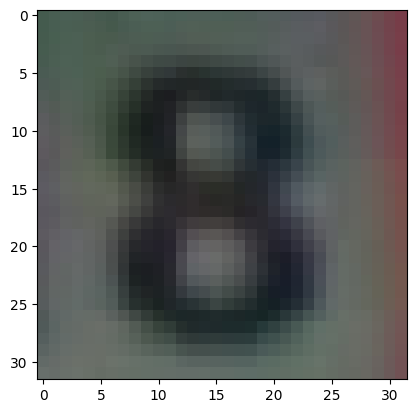

In [7]:

print(f" label:{train_labels[210]}")
#print(train_images[2100])
plt.imshow(train_images[210])
plt.show


In [8]:
train_images=train_images.astype('float64')
test_images=test_images.astype('float64')
train_labels=train_labels.astype('float64')
test_labels=test_labels.astype('float64')
#normalizing images
train_images=train_images/255
test_images=test_images/255


In [9]:
#one hot encoding
train_labels[train_labels == 10] = 0
test_labels[test_labels == 10] = 0
train_labels=to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)

In [10]:
# Split train data into train and validation sets for training model

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                  test_size=0.2, random_state=22)

In [18]:
#data augumentation
datagen = ImageDataGenerator(
    rotation_range=7,
    zoom_range=[0.95, 1.05],
    height_shift_range=0.05,
    shear_range=0.07
)


In [14]:
#building a cnn model
keras.backend.clear_session()

model=Sequential()
model.add(Input(shape=(32,32,3),name='input_layer'))
model.add(Conv2D(64,(5,5),activation='relu',name='conv2d_1'))
model.add(BatchNormalization())
model.add(Conv2D(32,(5,5),activation='relu',name='conv2d_2'))
model.add(Dropout(0.3, name='dropout_1'))
model.add(Conv2D(16,(5,5),activation='relu',name='conv2d_3'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),name='max_pooling'))
model.add(Conv2D(8,(5,5),activation='relu',name='conv2d_4'))
model.add(AveragePooling2D(pool_size=(2,2),name='Avg_pooling'))
model.add(Dropout(0.2, name='dropout_2'))
model.add(BatchNormalization())
model.add(Flatten(name='flatten'))
model.add(Dense(10,activation='softmax',name='dense'))



In [16]:
#compiling our model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
#history= model.fit(datagen.flow(X_train, y_train,batch_size=128), epochs=30,validation_data=(X_val,y_val), callbacks=[lr_schedule])

In [17]:
#Training the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=128),
    epochs=30,
    validation_data=(X_val, y_val)
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


458/458 ━━━━━━━━━━━━━━━━━━━━ 58s 105ms/step - accuracy: 0.3436 - loss: 1.9207 - val_accuracy: 0.7705 - val_loss: 0.8034
Epoch 2/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.7773 - loss: 0.7143 - val_accuracy: 0.7903 - val_loss: 0.6610
Epoch 3/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - accuracy: 0.8130 - loss: 0.6042 - val_accuracy: 0.8583 - val_loss: 0.4831
Epoch 4/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - accuracy: 0.8336 - loss: 0.5434 - val_accuracy: 0.8790 - val_loss: 0.3967
Epoch 5/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.8484 - loss: 0.4973 - val_accuracy: 0.8783 - val_loss: 0.4029
Epoch 6/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.8528 - loss: 0.4854 - val_accuracy: 0.8794 - val_loss: 0.4050
Epoch 7/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.8583 - loss: 0.4708 - val_accuracy: 0.8838 - val_loss: 0.3859
Epoch 8/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 79s 85ms/step - accuracy: 0.8609 - loss: 0.4521 - val_accura

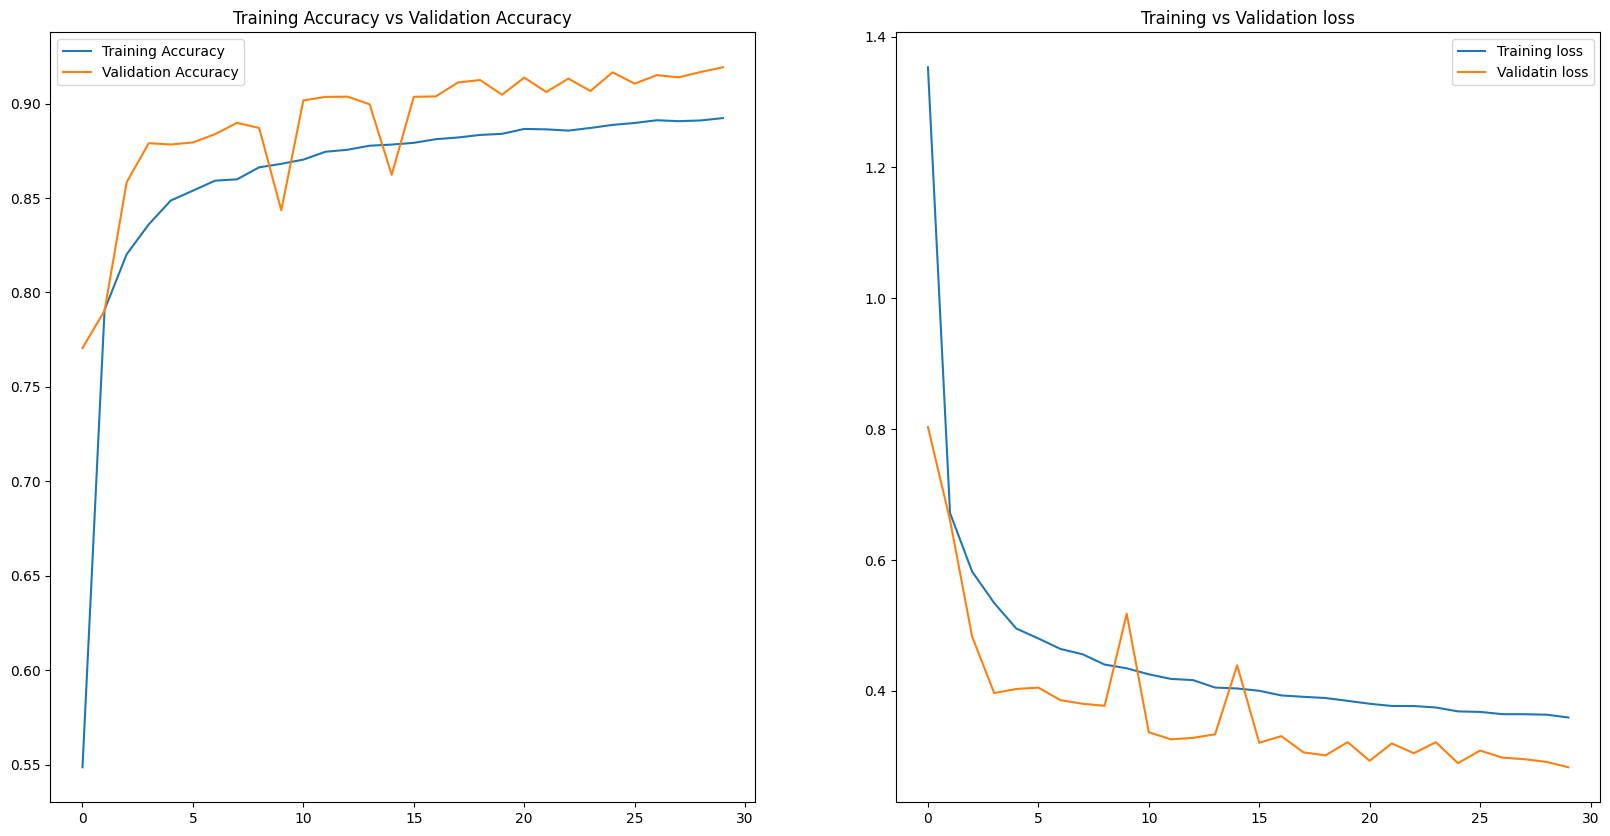

In [19]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(train_acc,label="Training Accuracy")
plt.plot(val_acc,label='Validation Accuracy')
plt.legend()
plt.title('Training Accuracy vs Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(train_loss,label="Training loss")
plt.plot(val_loss,label="Validatin loss")
plt.title("Training vs Validation loss")
plt.legend()

In [20]:
y_predict=model.predict(test_images)

814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [21]:

y_test_labels = np.argmax(test_labels, axis=1)
y_predict_labels = np.argmax(y_predict, axis=1)
print(y_train.shape)
print(y_predict.shape)

(58605, 10)
(26032, 10)


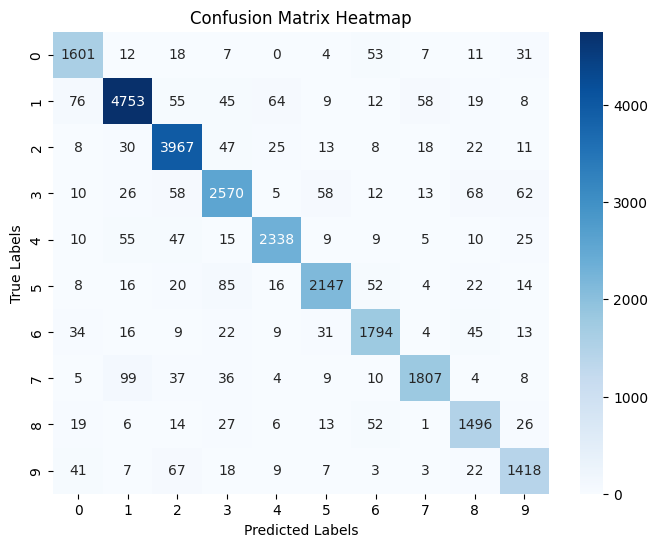

In [22]:
matrix=confusion_matrix(y_test_labels,y_predict_labels)
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [23]:
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score
accuracy = accuracy_score(y_test_labels, y_predict_labels)
precision=precision_score(y_test_labels,y_predict_labels,average='weighted')
recall=recall_score(y_test_labels,y_predict_labels,average='weighted')
f1=f1_score(y_test_labels,y_predict_labels,average='weighted')
print(f'The accuracy of the model is:{accuracy}\nThe precision of the model is:{precision}\nThe recall of the model is:{recall}\nThe F1 score of the model is:{f1}')

The accuracy of the model is:0.9177550706822373
The precision of the model is:0.9182403529547333
The recall of the model is:0.9177550706822373
The F1 score of the model is:0.9178182020406976
